# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 26.09.2021

Мягкий дедлайн: 23:59MSK 11.10.2021

Жесткий дедлайн: 23:59MSK 14.10.2021

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

In [284]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [286]:
data = pd.read_csv('train.csv')

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [287]:
data.drop(columns = 'dropoff_datetime', inplace = True)

In [288]:
data.pickup_datetime = pd.to_datetime(data.pickup_datetime)

In [289]:
data.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  
0                  N            455  
1                  N            663  
2                  N           2124  
3                  N            429  
4                  N            435

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

In [290]:
import seaborn as sns

Text(0.5, 1.0, 'распределение таргета в обучающей выборке')

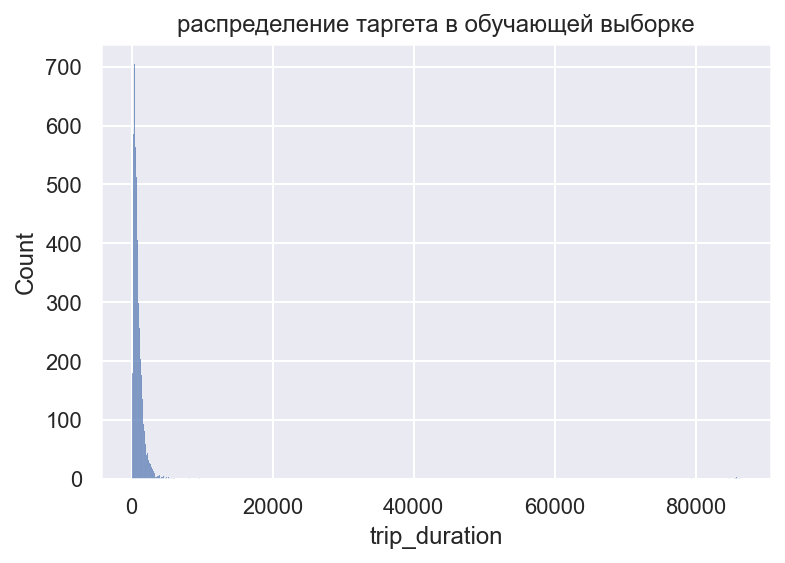

In [291]:
sns.histplot(data = data.sample(10000), x = 'trip_duration').set_title('распределение таргета в обучающей выборке')

к сожалению на всей выборке сиборн сходит с ума, так что приходится строить по 10000 рандомным,. это, к слову, тоже долго

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

тут большое количество "выбросов": очень редко люди любят кататься очень далеко. график экспоненциально (?ну это визуально, на деле сложно сказать, как именно) убывает на отрезке от 0 до 80000

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

потому что очень длинные поездки будут восприниматься моделью с MSE как выбросы. если же логарифмировать длительность, то выбросы уменьшатся, да и зависимость сама станет линейнее. точное значение мы скорее всего не предскажем - нам и приблизительное подойдет + так как время поездки неотрицательное, формула с логарифмом пойдет

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: 
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big( \hat{y} - \log{(\exp{\hat{a}(x_i)})} - 1 + 1\big)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big( \hat{y} - \hat{a}(x_i)\big)^2} = \text{RMSE}(X, \hat{y}, \hat{a})$$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [292]:
data['log_trip_duration'] = data.trip_duration.apply(np.log1p)

Text(0.5, 1.0, 'Распределение логарифма длительности поездки')

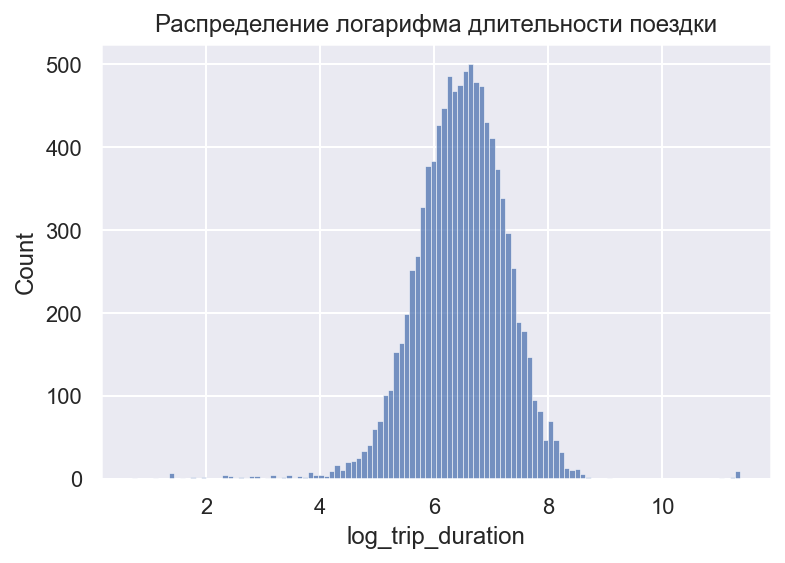

In [293]:
sns.histplot(data = data.sample(10000), x = 'log_trip_duration').set_title('Распределение логарифма длительности поездки')

In [66]:
#data.drop(columns = 'trip_duration', inplace = True)
# я не буду это делать она понадобится честно!

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

лучшим константным предсказанием при mse будет среднее

In [295]:
from sklearn.metrics import mean_squared_error

In [301]:
best_pred = np.mean(data.log_trip_duration)
(sum((data.log_trip_duration - best_pred)**2)/(len(data)))**0.5

0.7957592365412156

## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt

In [69]:
import matplotlib.dates as mdates

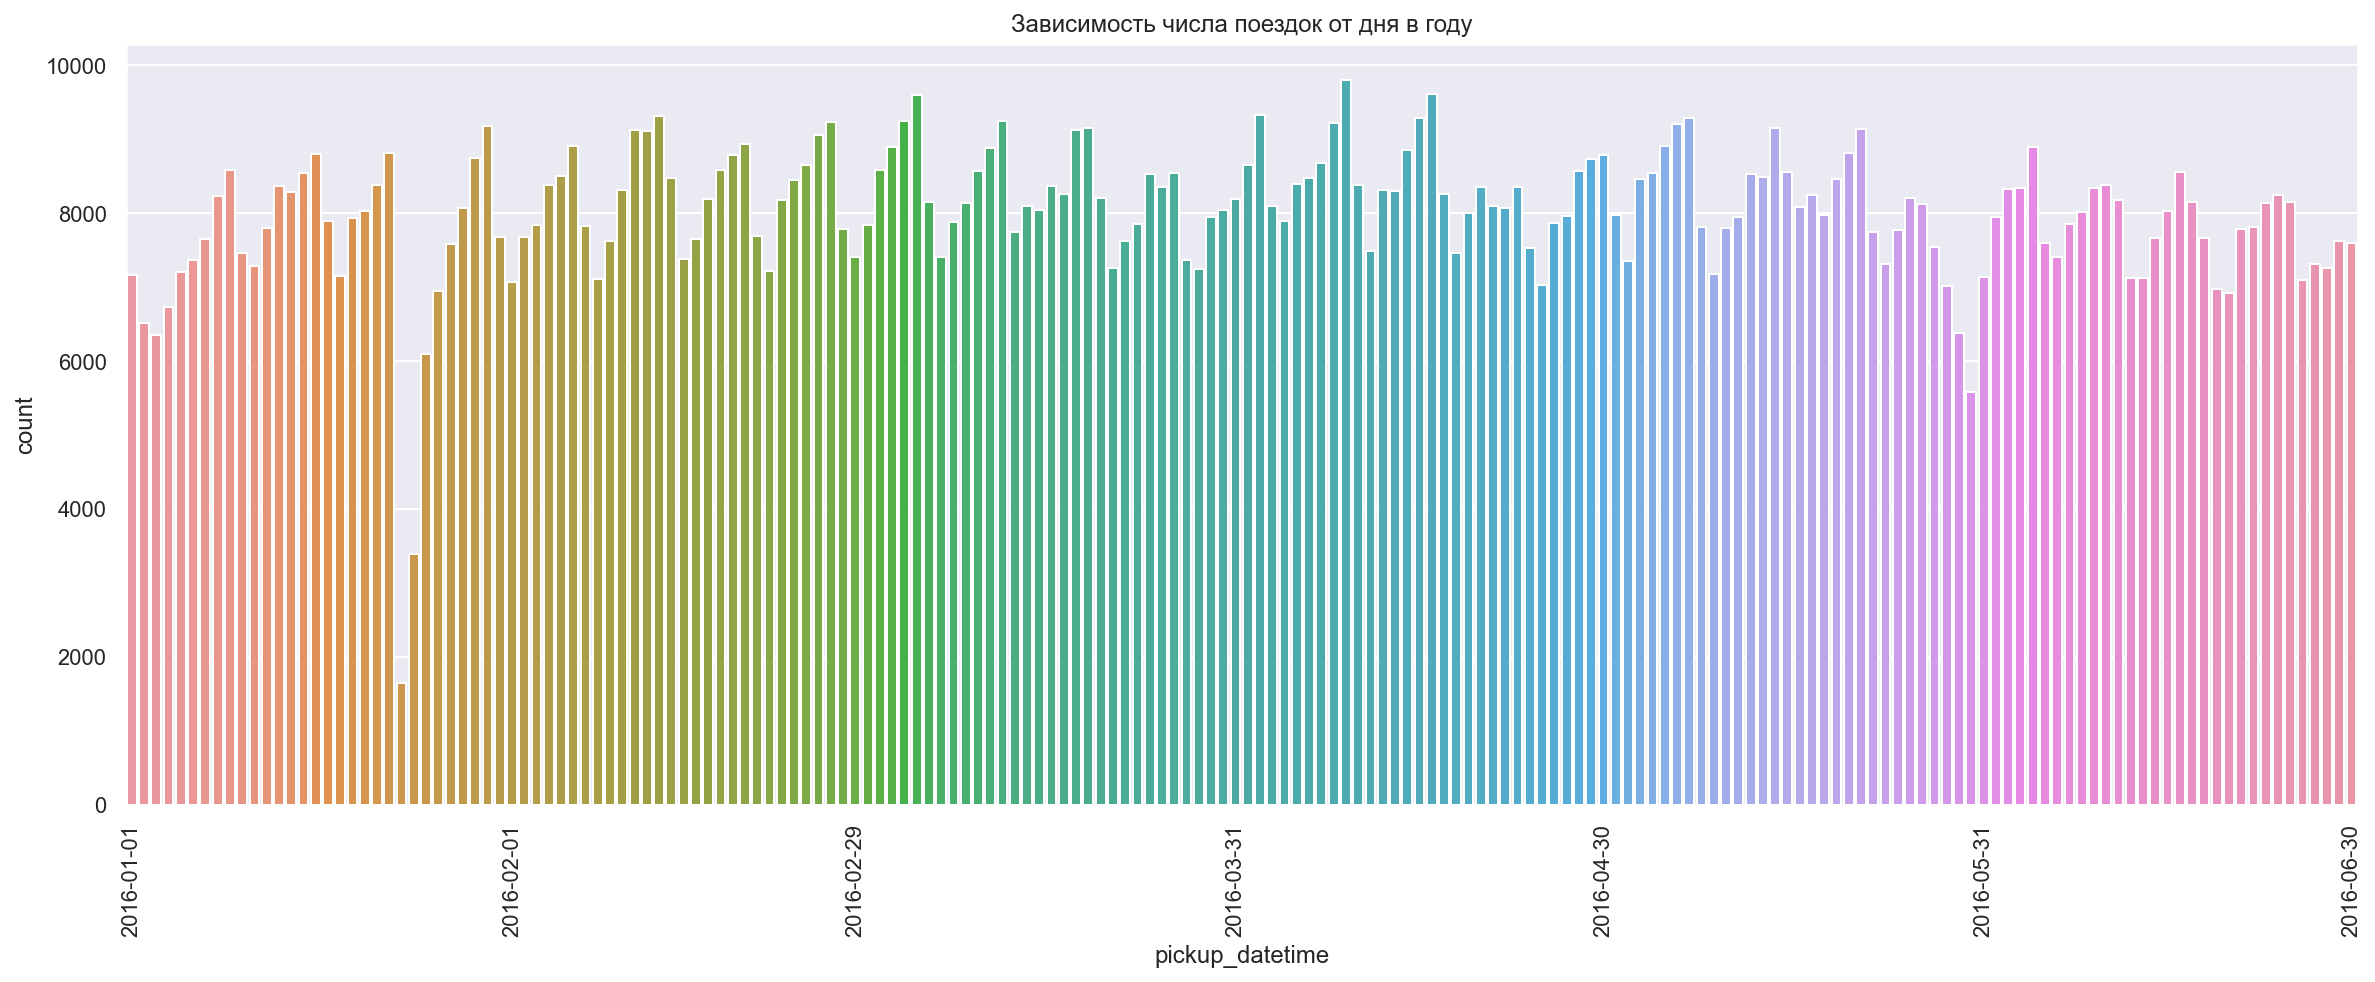

In [70]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 5
plt.rcParams['font.size'] = 12
sns.set_style('darkgrid')

fig, axes = plt.subplots(figsize=(20,7))
sns.countplot(x = data.sort_values(by = ['pickup_datetime'])['pickup_datetime'].dt.date).set_title('Зависимость числа поездок от дня в году')

#months = mdates.MonthLocator()
axes.xaxis.set_major_locator(mdates.MonthLocator())


plt.xticks(rotation = 'vertical')
plt.show()

A travel ban was instituted for New York City and Newark, New Jersey for January 23–24. The storm was given various unofficial names, including Winter Storm


30 мая -  memorial day, https://wtop.com/memorial-day/2021/05/qa-tips-on-how-to-beat-memorial-day-traffic/

In [71]:
import copy

In [72]:
df = copy.deepcopy(data)

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [73]:
df['days_of_the_week'] = df['pickup_datetime'].dt.dayofweek
df['hours'] = df['pickup_datetime'].dt.hour

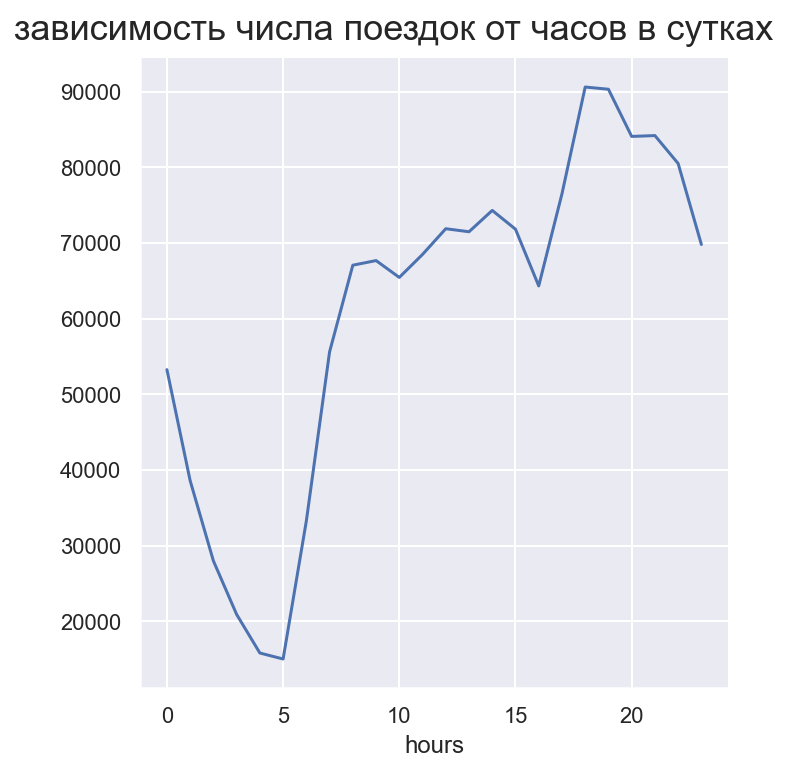

In [74]:
plot = sns.relplot(x = df.groupby(by = 'hours').count()['id'].index, y = df.groupby(by = 'hours').count()['id'].values, kind = 'line')

plot.fig.suptitle('зависимость числа поездок от часов в сутках', fontsize=18, verticalalignment = 'bottom') #я в общем-то не знаю как так получилось но теперь название не наезжает на график
fig.tight_layout()

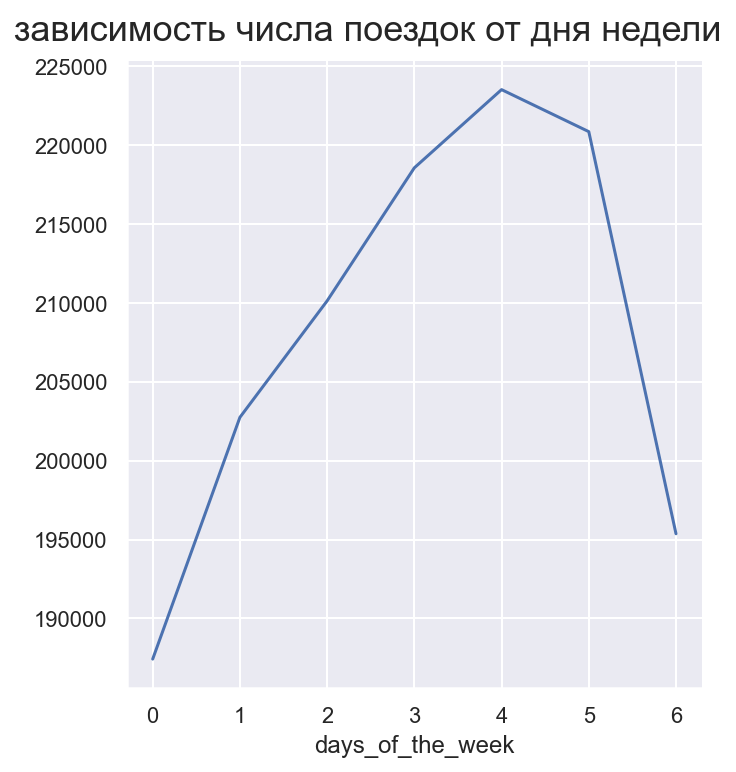

In [75]:
plot = sns.relplot(x = df.groupby(by = 'days_of_the_week').count()['id'].index, y = df.groupby(by = 'days_of_the_week').count()['id'].values, kind = 'line')
plot.fig.suptitle('зависимость числа поездок от дня недели', fontsize=18, verticalalignment = 'bottom') #я в общем-то не знаю как так получилось но теперь название не наезжает на график
fig.tight_layout()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [76]:
df['month'] = df['pickup_datetime'].dt.month

Text(0.5, 0.98, 'зависимость числа поездок от часа в сутках для разных месяцев')

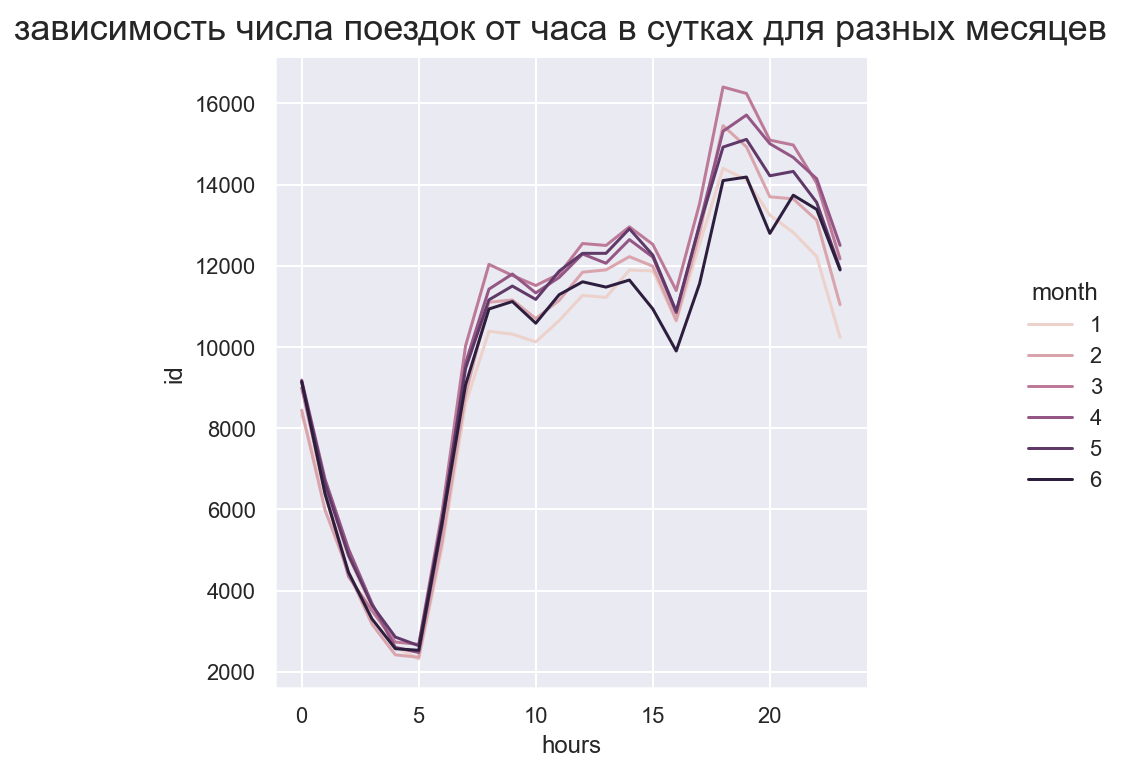

In [77]:
hours_dep_on_months = df.groupby(by = ['hours', 'month']).count()['id'].to_frame().reset_index()
plot = sns.relplot(data = hours_dep_on_months, x = 'hours', y = 'id', hue = 'month', kind = 'line')
plot.fig.suptitle('зависимость числа поездок от часа в сутках для разных месяцев', fontsize=18, verticalalignment = 'bottom')

Text(0.5, 0.98, 'зависимость числа поездок от часа в сутках для разных дней недели')

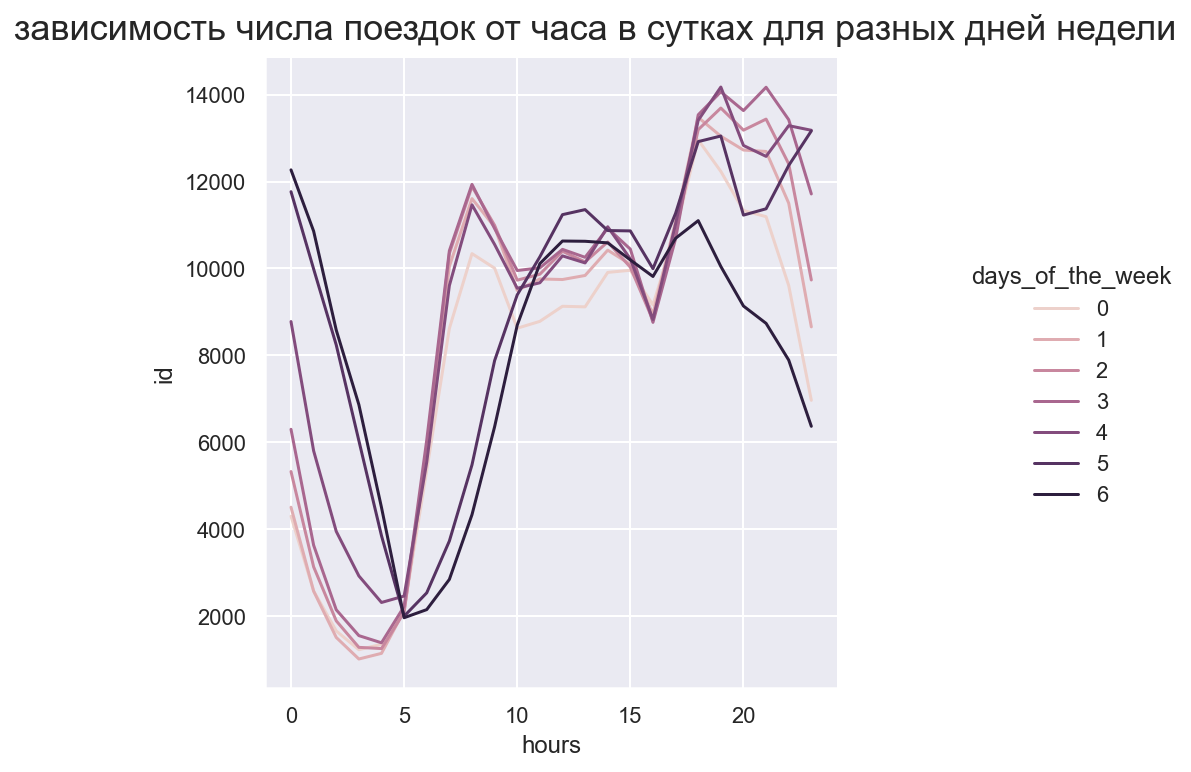

In [78]:
hours_dep_on_weekdays = df.groupby(by = ['hours', 'days_of_the_week']).count()['id'].to_frame().reset_index()
plot = sns.relplot(data = hours_dep_on_weekdays, x = 'hours', y = 'id', hue = 'days_of_the_week', kind = 'line')
plot.fig.suptitle('зависимость числа поездок от часа в сутках для разных дней недели', fontsize=18, verticalalignment = 'bottom')

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

чаще всего люди пользуются такси ближе к вечеру в выходные дни (пятница и суббота). в разные месяцы использование такси примерно одинаково, но в разные дни отличается. не знаю, с чем это связано, просто с обычным рабочим ходом жизни

In [79]:
df['day_of_the_year'] = df['pickup_datetime'].dt.dayofyear

In [80]:
X_train = df.sample(int(len(data)*0.7))
X_test=df.drop(X_train.index)

In [81]:
weeks = X_train.groupby(by = ['days_of_the_week'])['log_trip_duration'].mean()
time = X_train.groupby(by = ['hours'])['log_trip_duration'].mean()
year = X_train.groupby(by = ['day_of_the_year'])['log_trip_duration'].mean()

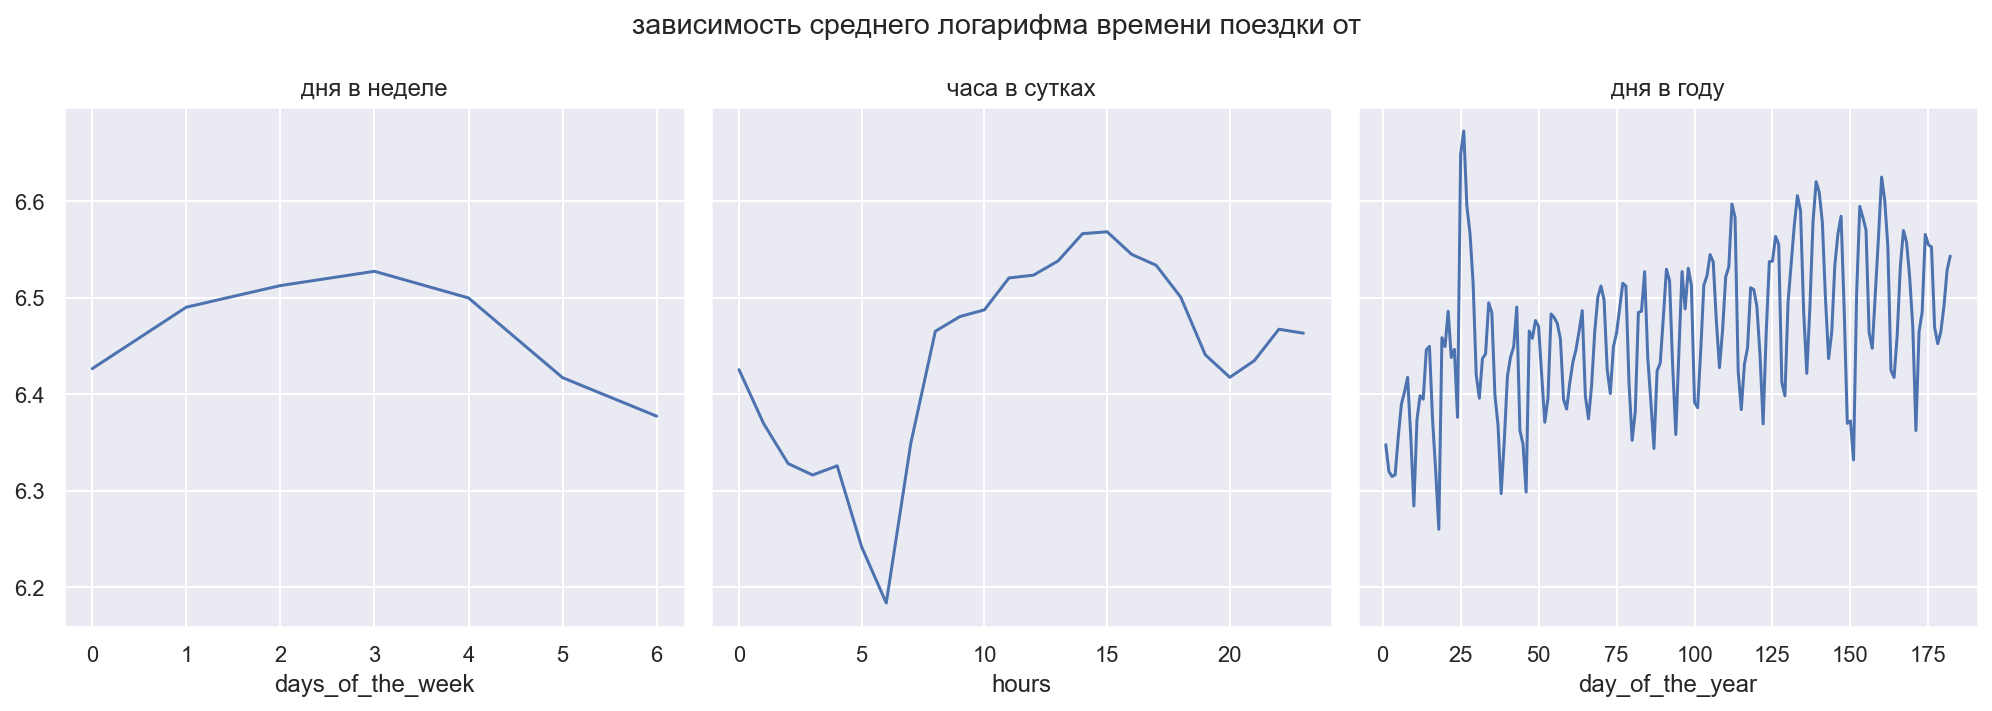

In [82]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5), sharey=True)

sns.lineplot(y = weeks.values, x = weeks.index, ax = axes[0]).set_title('дня в неделе')
sns.lineplot(y = time.values, x = time.index, ax = axes[1]).set_title('часа в сутках')
sns.lineplot(y = year.values, x = year.index, ax = axes[2]).set_title('дня в году')

fig.suptitle('зависимость среднего логарифма времени поездки от')

fig.tight_layout()
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

зависимость таргета от дня недели и часа в сутках в целом напоминают похожие графики для количества поездок
в аномальные дни логарифм времени поездки высок, потому что люди долго стоят в пробке (во время бури или перекрытия дорог). от дня в году тренд времени поездки периодичен - это неудивительно, скорее всего период = неделе - как мы видим по графику дня в неделе он не константный)
последние дни на графике близятся к лету - там оказывается наибольшая длина поездки

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

блин а я специально для того чтоб ориг не портить делала копию датасета, ну ладно, можно и повторить

In [83]:
import datetime

In [84]:
data['weekday'] = data['pickup_datetime'].dt.dayofweek
data['month'] = data['pickup_datetime'].dt.month
data['hour'] = data['pickup_datetime'].dt.hour
data['anomaly'] = data['pickup_datetime'].apply(lambda x: 0 if ((x.month == 1)&(x.day<=24)&(x.day>=22))|((x.month == 5)&(x.day == 30)) else 1)
data['yearday'] = data['pickup_datetime'].dt.dayofyear

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

вообще имхо по-хорошему каждый из новосозданных признаков стоит рассмотреть как категориальный, но если те же дни в году рассматривать как категориальные, у нас получится порядка 180 фичей - многовато и можем переобучиться легко. так что все кроме дня в году будет категориальным, а он численным  

In [85]:
categorical_cols = ['weekday', 'hour', 'anomaly', 'month']
numerical_cols = ['yearday']

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

источник: https://www.kaggle.com/alexisbcook/pipelines

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(data[categorical_cols+numerical_cols], data['log_trip_duration'], test_size=0.3, random_state=42)

In [88]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [89]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [90]:
((y_pred - y_test)**2).mean()**0.5

0.7882466024663766

## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [91]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [92]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [93]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

два аэропорта за чертой города, и так-то там их 3 и я бы прям все 3 выделила

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [96]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

data['haversine'] = data.apply(lambda x: haversine_array(x['pickup_longitude'], x['pickup_latitude'], x['dropoff_longitude'], x['dropoff_latitude']), axis=1)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [97]:
data['loghaversine'] = np.log(data['haversine'])

C:\Users\Masha\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

пользуюсь: https://stackoverflow.com/questions/39409866/correlation-heatmap
захотелось по-красоте сделать потому что

In [98]:
corr = data[['loghaversine', 'haversine', 'log_trip_duration']].corr()

Text(0.5, 1.0, 'корреляция haversine, log haversine и таргета')

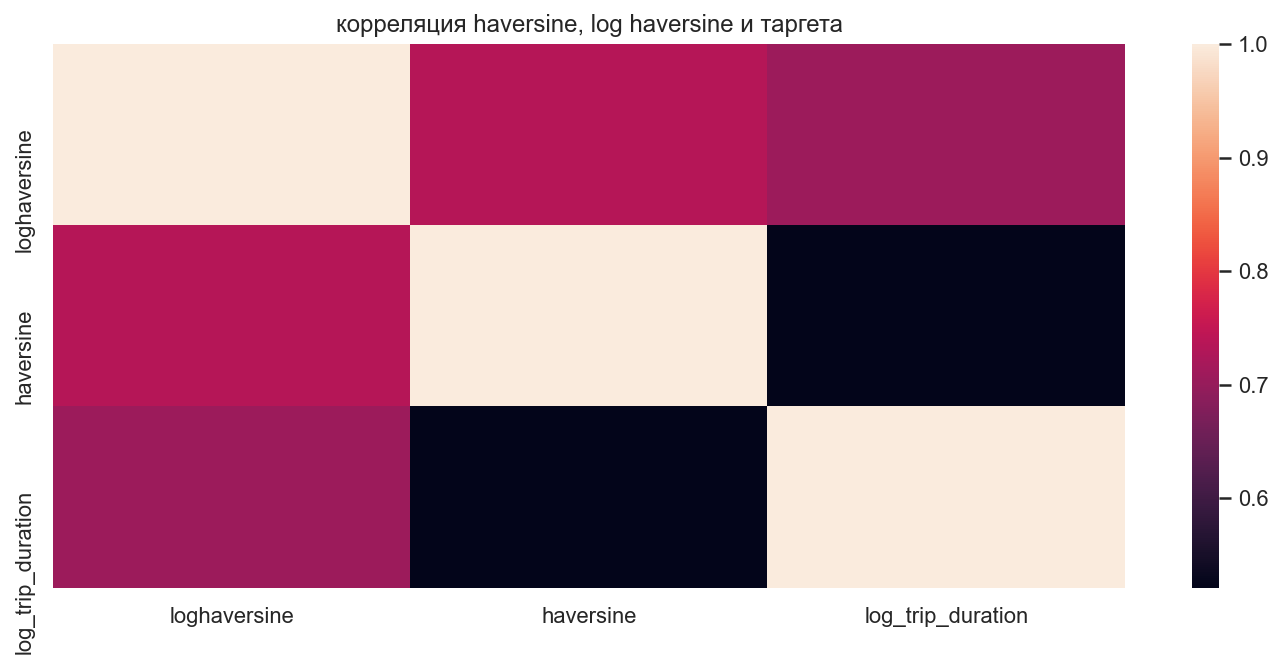

In [99]:
sns.heatmap(corr).set_title('корреляция haversine, log haversine и таргета')

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

да вы че опять трейнтестсплит???

In [100]:
X_train, X_test, y_train, y_test = train_test_split(data, data['log_trip_duration'], test_size=0.3, random_state=42)

<AxesSubplot:ylabel='Count'>

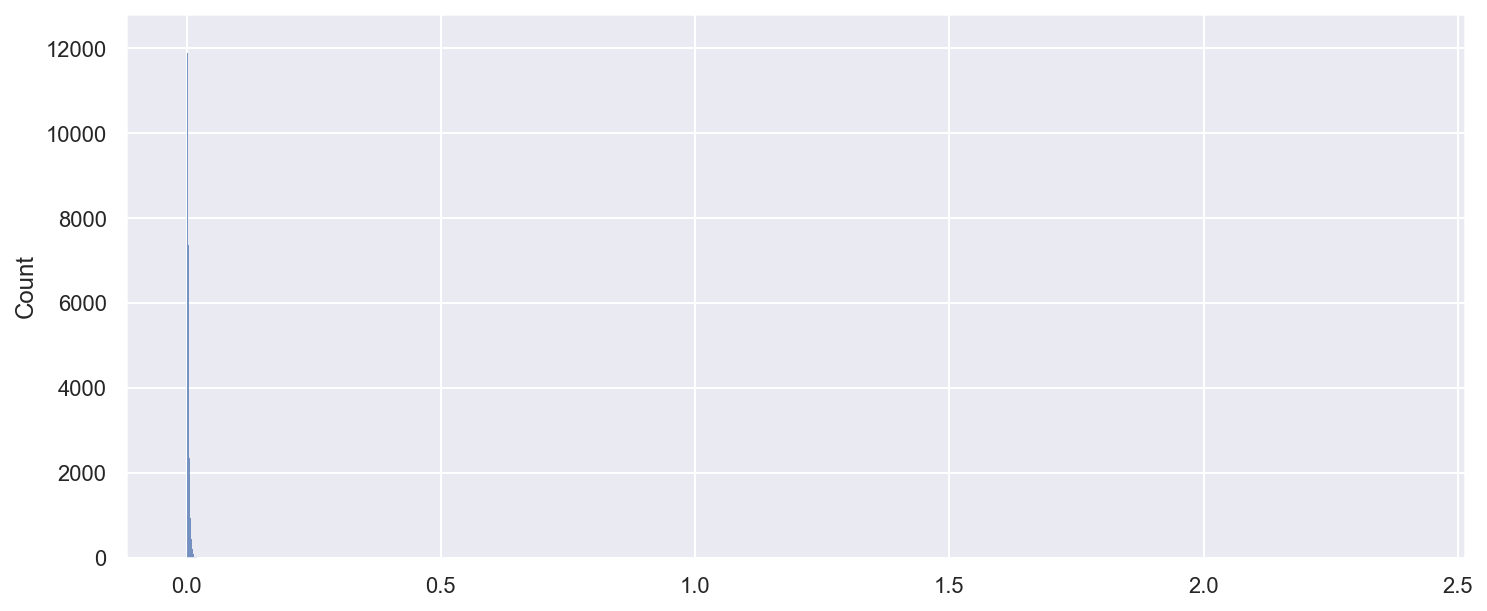

In [101]:
sns.histplot(X_train['haversine'] / X_train['trip_duration'])

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

In [102]:
X_train['speed'] = X_train['haversine'] / X_train['trip_duration']

<ipython-input-102-2dc44d5bc0db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['speed'] = X_train['haversine'] / X_train['trip_duration']


Text(0.5, 1.0, ' гистограмма по объектам, для которых значение скорости получилось разумным ')

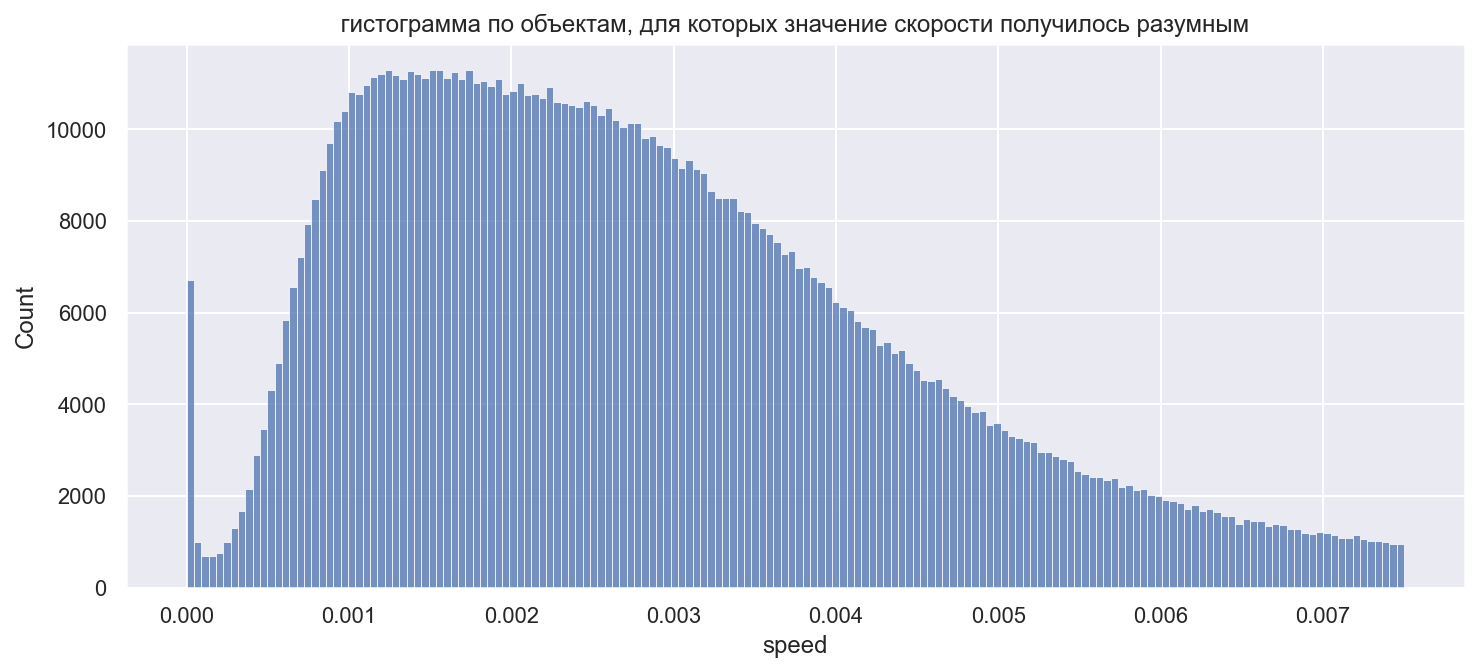

In [103]:
sns.histplot(X_train[X_train['speed'] < X_train['speed'].quantile(0.95)]['speed']).set_title(' гистограмма по объектам, для которых значение скорости получилось разумным ')

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [104]:
idk_how_to_call = X_train.groupby(by = ['hour', 'weekday'])['speed'].median().to_frame().reset_index()

In [105]:
pivoted = idk_how_to_call.pivot(index='weekday', columns='hour', values='speed')

<AxesSubplot:xlabel='hour', ylabel='weekday'>

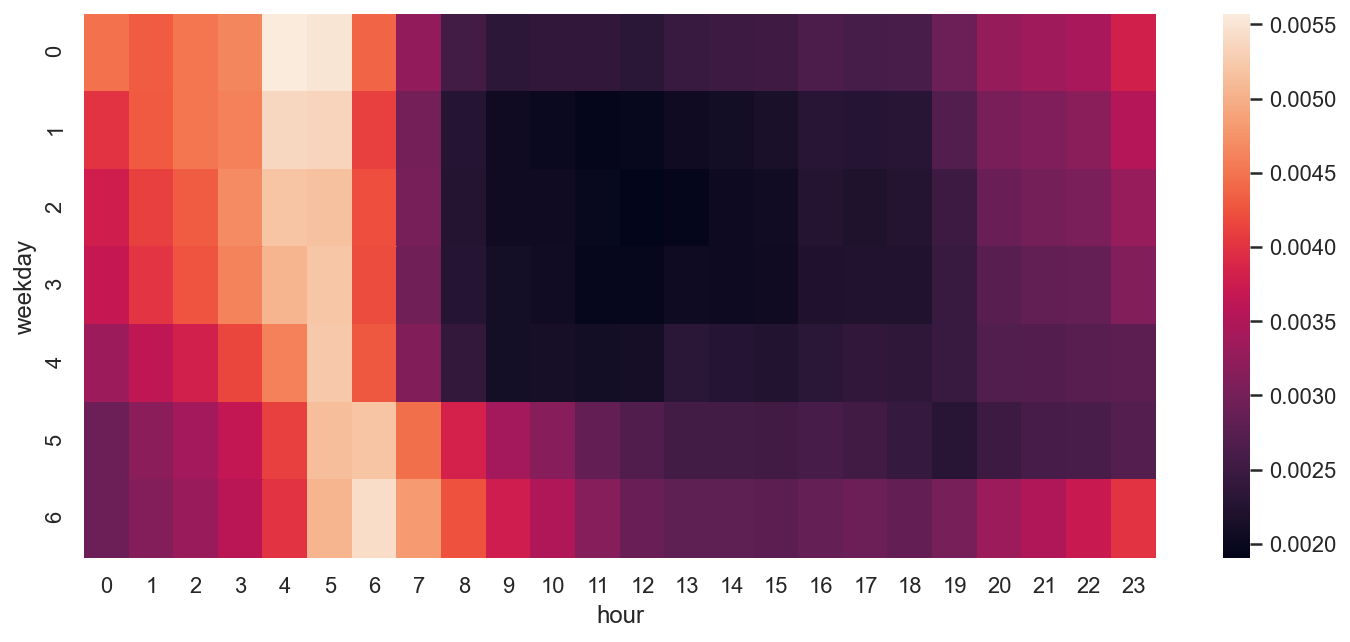

In [106]:
sns.heatmap(pivoted)

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

In [107]:
X_train.drop(columns = 'speed', inplace = True)

C:\Users\Masha\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


мы получили ее из целевой переменной, которую хотим предсказывать))00

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

в общем я сначала собиралась через nlargest и nsmallest найти ребят в таблице idk_how_to_call, но тогда я буду слишком сильно на таргет опираться. лучше будет криво, но честно и исходя из здравого смысла: меньше всего пробок по будним дням часа в 4-5 утра, потому что людям через 2 часа на работу вставать, спят все. аналогично в промежутке с 5-7 утра в выходные. больше всего пробок в будни в рабочее время: с 9 до 15 включительно (что, к слову, интуитивно не очень понятно)

In [108]:
data.loc[:,'heavy_traffic'] = data.apply(lambda x: 1 if ((x.weekday<5) & (x.hour<16) & (x.hour>8)) else 0, axis = 1)

In [109]:
data.loc[:, 'light_traffic'] = data.apply(lambda x: 1 if (((x.weekday<5) & ((x.hour == 4) | (x.hour == 5)))|((x.weekday>=5) & ((x.hour > 4) | (x.hour < 8)))) else 0, axis = 1)

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

хочу 3 точки на все аэропорты (.____.)

In [110]:
#haversine_array(lat1, lng1, lat2, lng2)

In [111]:
airports = {'newark': (40.690649956793706, -74.17730554360433), 'jfk': (40.65229201067954, -73.79375169427144), 'laguardia': (40.77670520993376, -73.87404348963246)}

In [ ]:
def check_proximity(x, airport):
    proximity = haversine_array(x[0], x[1], airport[0], airport[1])
    if proximity< 2:
        return 1
    else:
        return 0

for airport in airports.keys():
    X_train[airport+'_start'] = X_train.apply(lambda x: check_proximity(x[['pickup_latitude', 'pickup_longitude']], airports[airport]), axis = 1)
    print(airport+'отправка заранилась')
    X_train[airport+'_finish'] = X_train.apply(lambda x: check_proximity(x[['dropoff_latitude', 'dropoff_longitude']], airports[airport]), axis = 1)
    print(airport+'прибытие заранилось')

код выше ранится как-то непростительно долго, я не готова это потом повторять со всей датой, поэтому упростим:

In [112]:
airports = {'newark': ((40.66124416049356, 40.71013932912563), (-74.1970720912059, -74.1502308320132)), 'jfk': ((40.62030021191673, 40.67072017624472), (-73.82768945423285, -73.74092344004426)), 'laguardia': ((40.76356417353481, 40.78290337766091), (-73.889925928644, -73.85297523053465))}

In [113]:
for airport in airports.keys():
    
    lat1 = airports[airport][0][0]
    lat2 = airports[airport][0][1]
    lng1 = airports[airport][1][0]
    lng2 = airports[airport][1][1]
    
    data[airport+'_start'] = data.apply(lambda x: 1 if ((x.pickup_latitude>lat1)&(x.pickup_latitude<lat2)&(x.pickup_longitude>lng1)&(x.pickup_longitude<lng2)) else 0, axis = 1)
    print(airport+' отправка заранилась')
    data[airport+'_finish'] = data.apply(lambda x: 1 if ((x.dropoff_latitude>lat1)&(x.dropoff_latitude<lat2)&(x.dropoff_longitude>lng1)&(x.dropoff_longitude<lng2)) else 0, axis = 1)
    print(airport+' прибытие заранилось')

newark отправка заранилась
newark прибытие заранилось
jfk отправка заранилась
jfk прибытие заранилось
laguardia отправка заранилась
laguardia прибытие заранилось


In [114]:
sum(data['jfk_finish']!=0) #они как минимум не пустые

13658

In [115]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'log_trip_duration', 'weekday', 'month', 'hour', 'anomaly', 'yearday',
       'haversine', 'loghaversine', 'heavy_traffic', 'light_traffic',
       'newark_start', 'newark_finish', 'jfk_start', 'jfk_finish',
       'laguardia_start', 'laguardia_finish'],
      dtype='object')

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

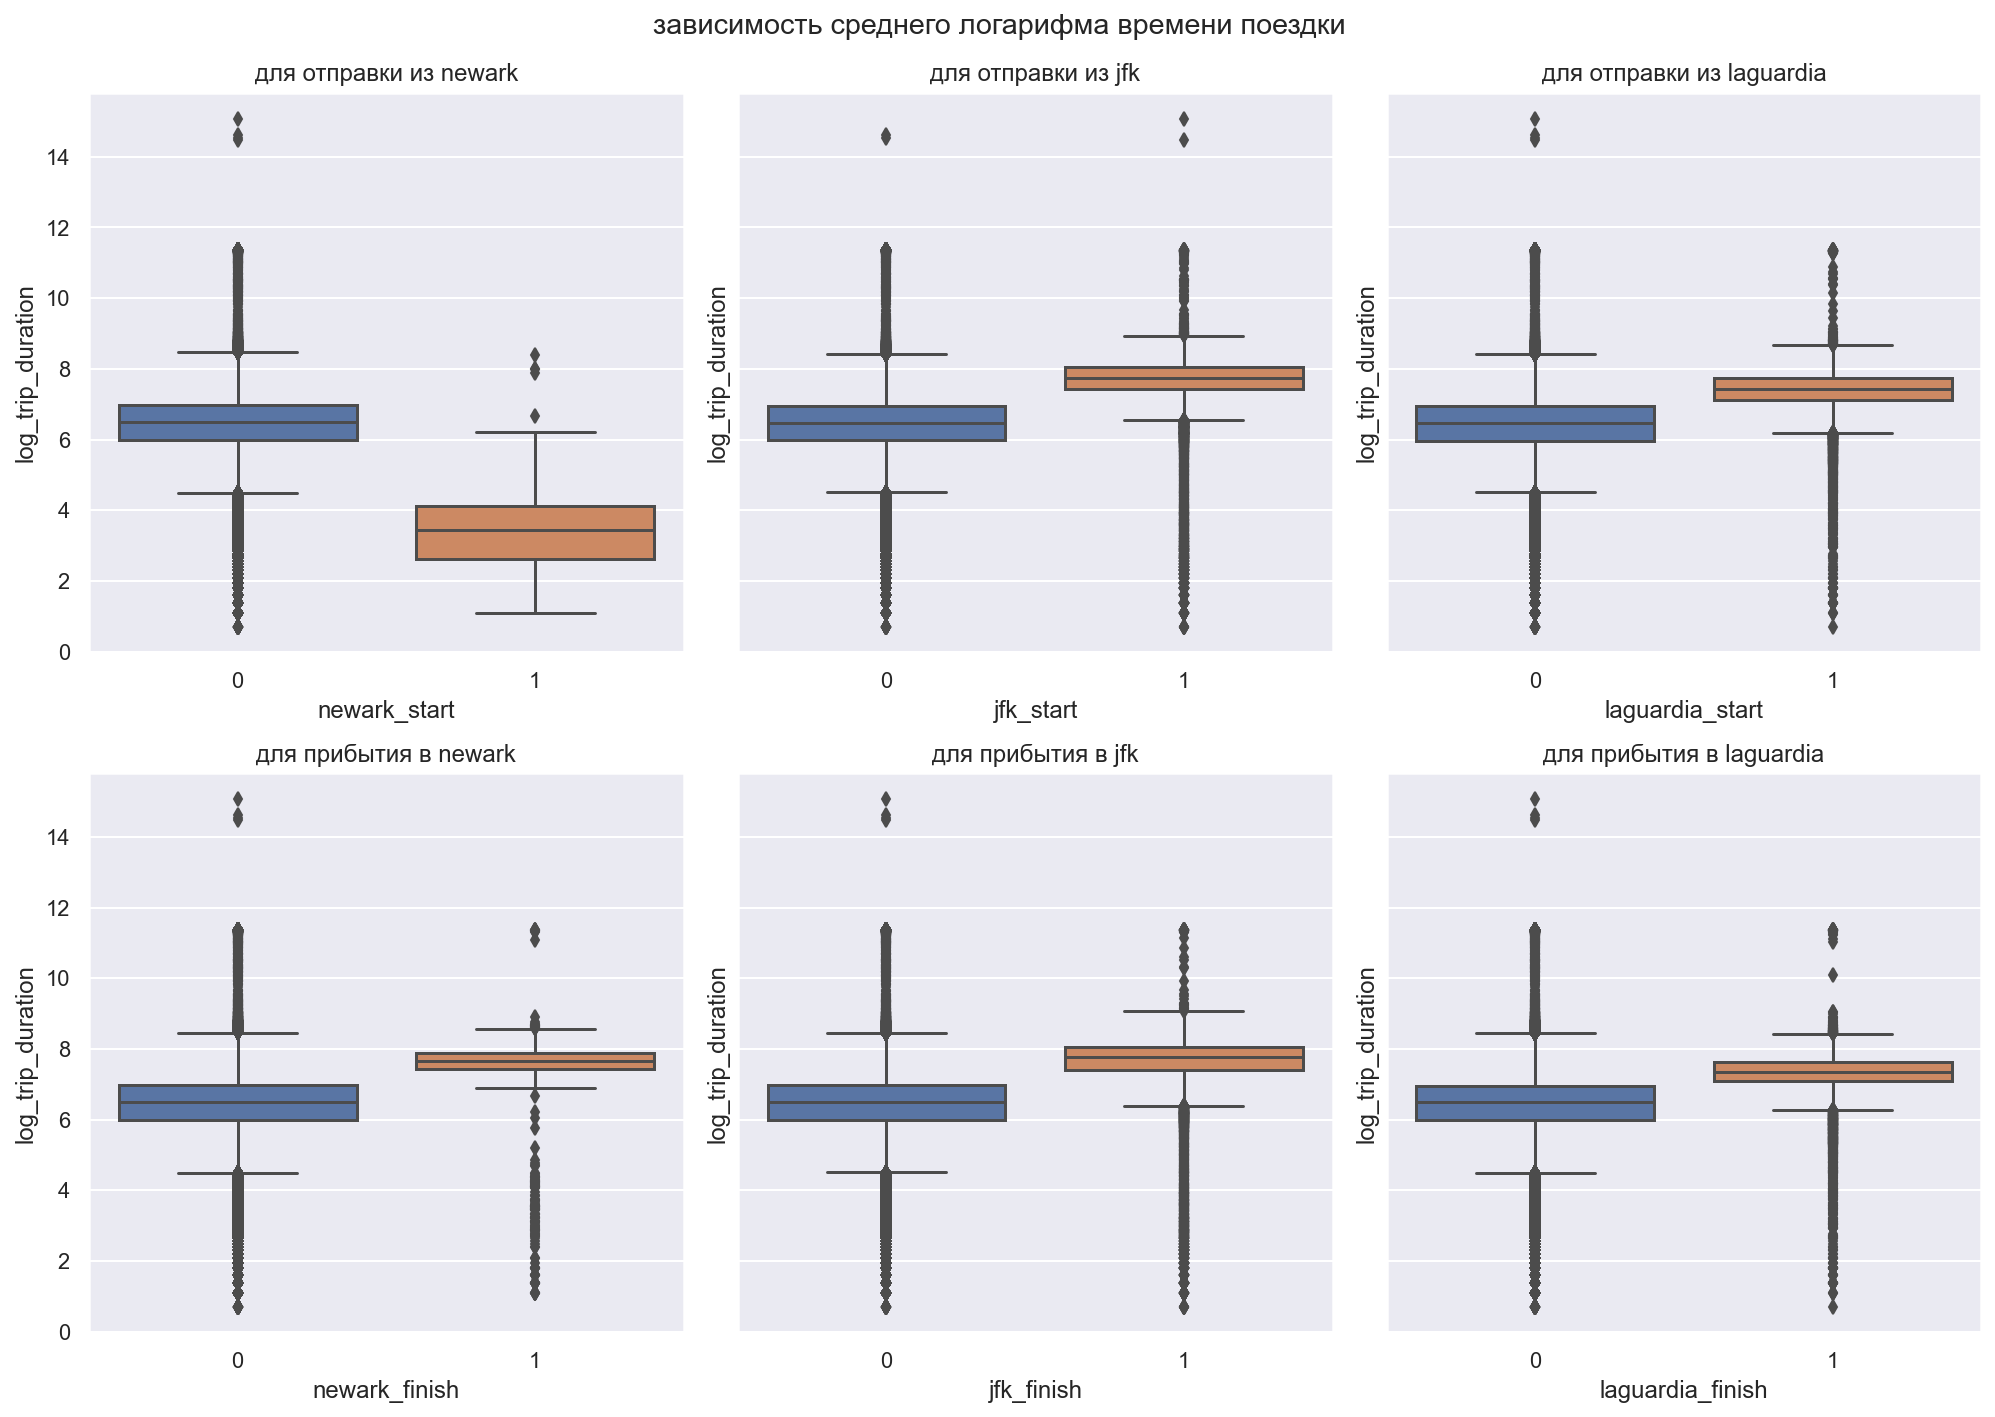

In [116]:
fig, axes = plt.subplots(2, 3, figsize=(14, 10), sharey=True)

for airport, counter in zip(airports.keys(), range(3)):
    sns.boxplot(data = data, x = airport+'_start', y = 'log_trip_duration', ax = axes[0, counter]).set_title('для отправки из '+airport)  
    sns.boxplot(data = data, x = airport+'_finish', y = 'log_trip_duration', ax = axes[1, counter]).set_title('для прибытия в '+airport)

fig.suptitle('зависимость среднего логарифма времени поездки')

fig.tight_layout()
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

в данных большое количество выбросов, но большая часть (интерквартильное расстояние) распределена по-разному на поездках в аэропорт и не в аэропорт. поэтому эти признаки в перспективе могут оказаться полезными

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [117]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = 'log_trip_duration'), data['log_trip_duration'], test_size=0.3, random_state=42)

In [118]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):

    def fit(self, X, y = None):
        self.PERCENTILE = 6
        self.ROWS = 3
        self.COLUMNS = 6
        east, self.west, north, self.south = self.choose_grid(X)
        self.hor_step = (east- self.west)/self.COLUMNS
        self.vert_step = (north- self.south)/self.ROWS
        
        return self
    
    def transform(self, X, y = None):
        horizontal_start = (X.pickup_longitude - self.west)//self.hor_step +1
        horizontal_start[(horizontal_start>self.COLUMNS) | (horizontal_start<1)] = 0
        
        vertical_start = (X.pickup_latitude - self.south)//self.vert_step +1
        vertical_start[(vertical_start>self.ROWS) | (vertical_start<1)] = 0
        
        horizontal_finish = (X.dropoff_longitude - self.west)//self.hor_step +1
        horizontal_finish[(horizontal_finish>self.COLUMNS) | (horizontal_finish<1)] = 0
        
        vertical_finish = (X.dropoff_latitude - self.south)//self.vert_step +1
        vertical_finish[(vertical_finish>self.ROWS) | (vertical_finish<1)] = 0
                
        square_start = (vertical_start!=0)* horizontal_start + (vertical_start-1) * self.COLUMNS * (horizontal_start!= 0)
        square_start[square_start <= 0] = -1
        square_finish = (vertical_finish!=0)*horizontal_finish + (vertical_finish-1) * self.COLUMNS* (horizontal_finish!= 0)
        square_finish[square_finish <= 0] = -1
                        
        return (square_start, square_finish)
        
    def choose_grid(self, X):
        west = np.percentile(np.append(X_train['pickup_longitude'].to_numpy(), X_train['dropoff_longitude'].to_numpy()), self.PERCENTILE)
        east = np.percentile(np.append(X_train['pickup_longitude'].to_numpy(), X_train['dropoff_longitude'].to_numpy()), 100 - self.PERCENTILE)
        north = np.percentile(np.append(X_train['pickup_latitude'].to_numpy(), X_train['dropoff_latitude'].to_numpy()), 100 - self.PERCENTILE)
        south = np.percentile(np.append(X_train['pickup_latitude'].to_numpy(), X_train['dropoff_latitude'].to_numpy()), self.PERCENTILE)
        return (east, west, north, south)
    

In [119]:
transformer = MapGridTransformer()
transformer.fit(data)
start, finish = transformer.transform(data)

In [120]:
sum(finish==-1)/len(data)

0.22511387288467918

In [121]:
data['start_coords'] = start

In [122]:
sample = data.sample(10000)

In [123]:
show_circles_on_map(sample[sample.start_coords == 8], "pickup_latitude", "pickup_longitude", "red")

я в общем поигралась и кажется я не знаю по итогу что такое широта-долгота и с каких сторон какие стороны света (там сверху в коде все перепутано). но в целом все работает. надеюсь на мо1 не снижают оценки за незнание сторон света как за незнание греческих букв

C:\Users\Masha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

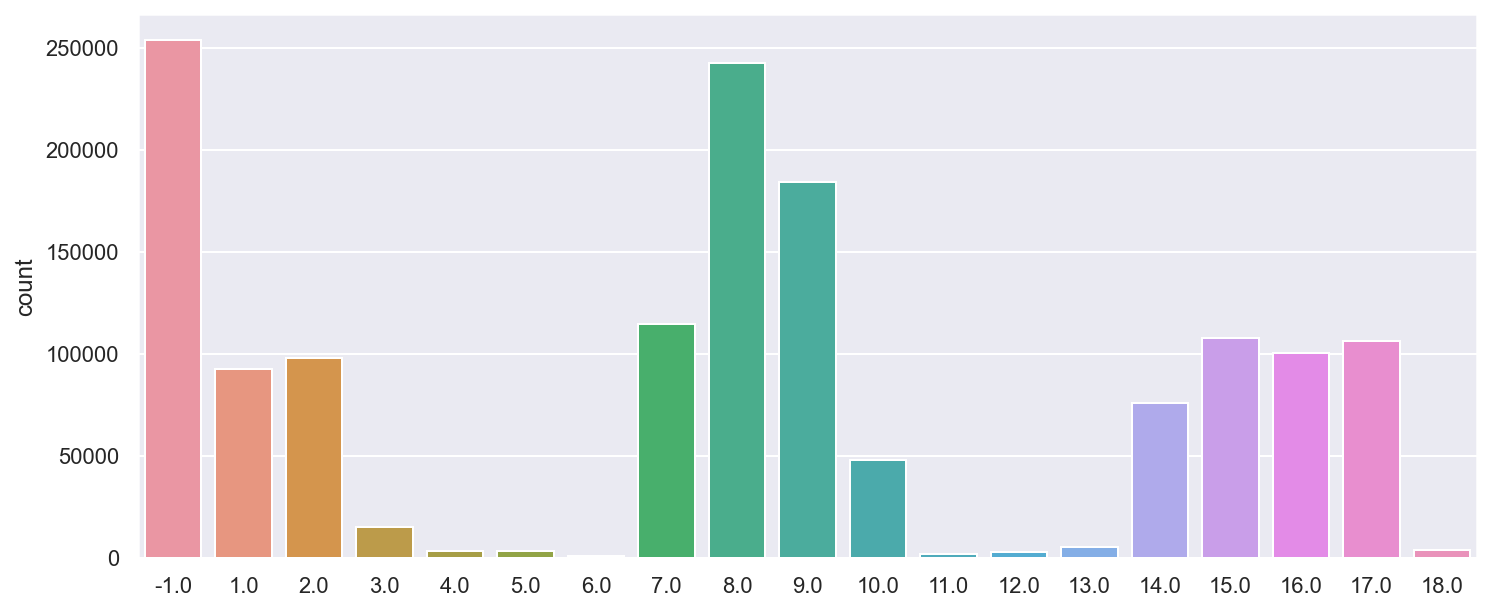

In [124]:
sns.countplot(start)

In [125]:
data['finish_coords'] = finish

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [126]:
data.dtypes #жесть их много уже

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
log_trip_duration            float64
weekday                        int64
month                          int64
hour                           int64
anomaly                        int64
yearday                        int64
haversine                    float64
loghaversine                 float64
heavy_traffic                  int64
light_traffic                  int64
newark_start                   int64
newark_finish                  int64
jfk_start                      int64
jfk_finish                     int64
laguardia_start                int64
laguardia_finish               int64
start_coords                 float64
f

In [127]:
data_na_vsyakii_sluchai = copy.deepcopy(data)

In [128]:
categorical_cols = ['weekday', 'month', 'hour', 'anomaly', 'heavy_traffic', 'light_traffic', 'newark_start', 'newark_finish', 'jfk_start', 'jfk_finish', 'laguardia_start', 'laguardia_finish', 'start_coords', 'finish_coords']
numerical_cols = ['yearday', 'loghaversine']

ValueError: Input contains infinity or a value too large for dtype('float64') -будем разбираться, в чем дело, ставлю на логарифмирование

в общем-то да, так и есть, просто не стоит логарифмировать нулевые скорости

In [129]:
X = data[categorical_cols+numerical_cols]
y = data['log_trip_duration']

In [130]:
X.loghaversine.sort_values()

1220482        -inf
1431681        -inf
848955         -inf
70792          -inf
1127650        -inf
             ...   
1013474    6.390610
1100676    6.429182
923793     6.437476
397526     6.496494
974378     6.747549
Name: loghaversine, Length: 1458644, dtype: float64

In [131]:
X['loghaversine'].replace({-np.inf: -1}, inplace=True)

C:\Users\Masha\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [133]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [134]:
((y_pred - y_test)**2).mean()**0.5

0.5340684891009111

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

vendor_id - провайдер такси - у кого-то длинные поездки могут стоить дешевле, поэтому их могут для длинных поездок выбирать чаще
passenger_count - чисто интуитивно если с пацанами садишься в такси можно скинуться и проехать большее расстояние, а еще можно людей высаживать в разных точках - тоже километраж набегает
store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - если честно не очень понимаю как может быть полезно. но возможно соединения не было потому что человек ехал издалека (пригороды), но так как приехал в манхэттен, на общую карту он попал. тогда расстояние будет больше - от  пригорода до центра далеко ехать

In [135]:
data.vendor_id.unique().shape[0]

2

In [136]:
data.passenger_count.unique().shape[0]

10

In [137]:
data.store_and_fwd_flag.unique().shape[0]

2

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

Text(0.5, 1.0, 'лог времени поездки в зависимости от количества пассажиров')

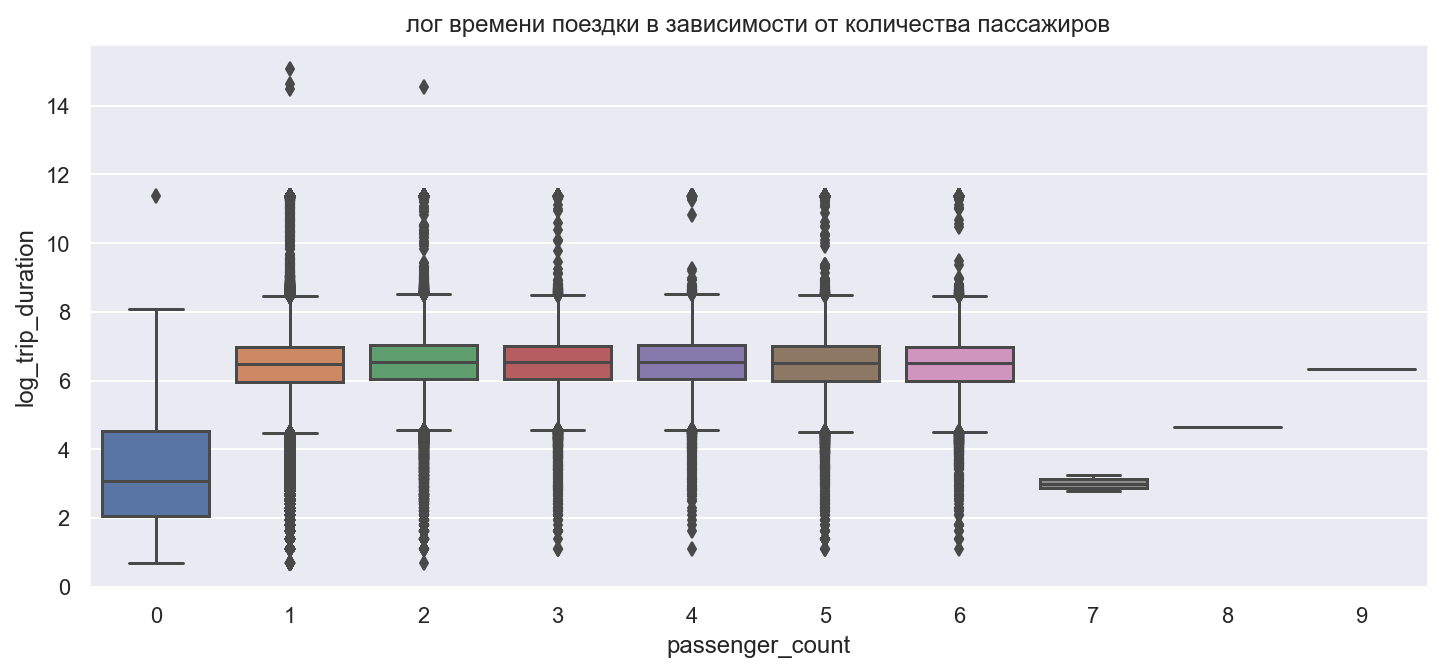

In [138]:
 sns.boxplot(data=data, x='passenger_count', y='log_trip_duration').set_title('лог времени поездки в зависимости от количества пассажиров')

Text(0.5, 1.0, 'лог времени поездки в зависимости от store и fwd ')

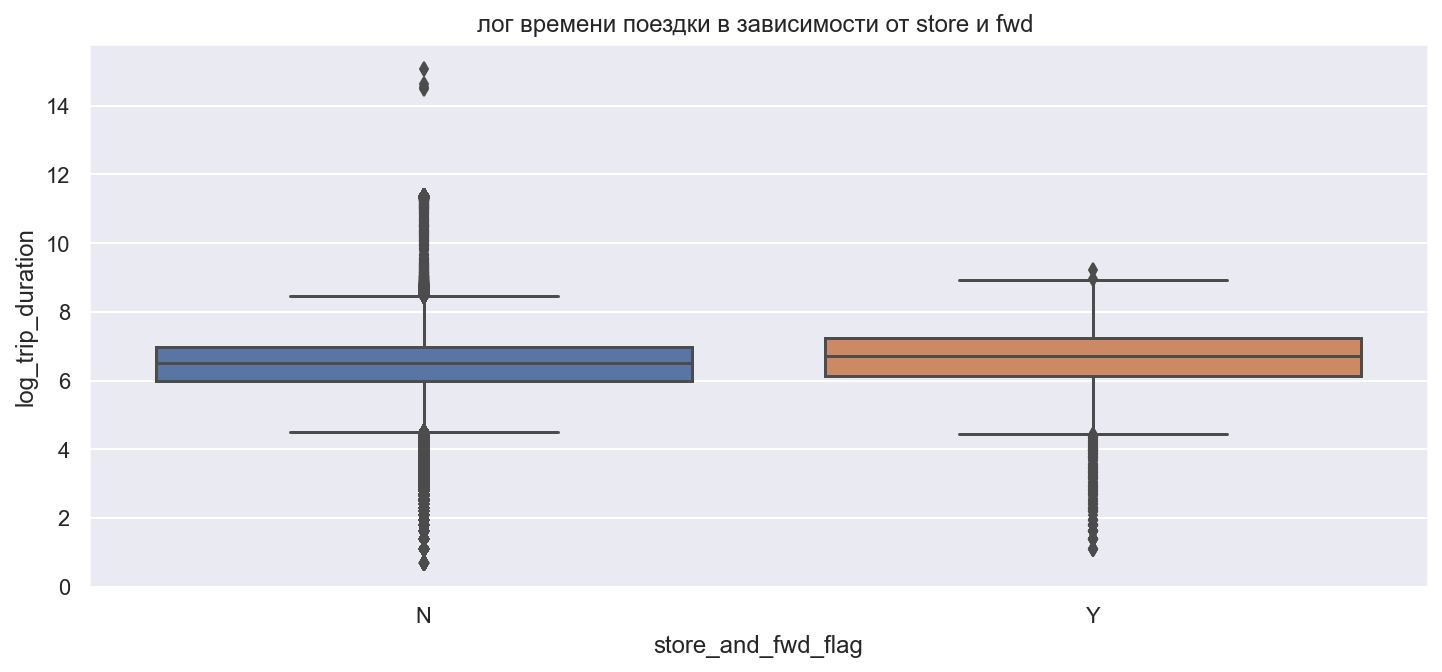

In [139]:
 sns.boxplot(data=data, x='store_and_fwd_flag', y='log_trip_duration').set_title('лог времени поездки в зависимости от store и fwd ')

Text(0.5, 1.0, 'лог времени поездки в зависимости от vendor_id')

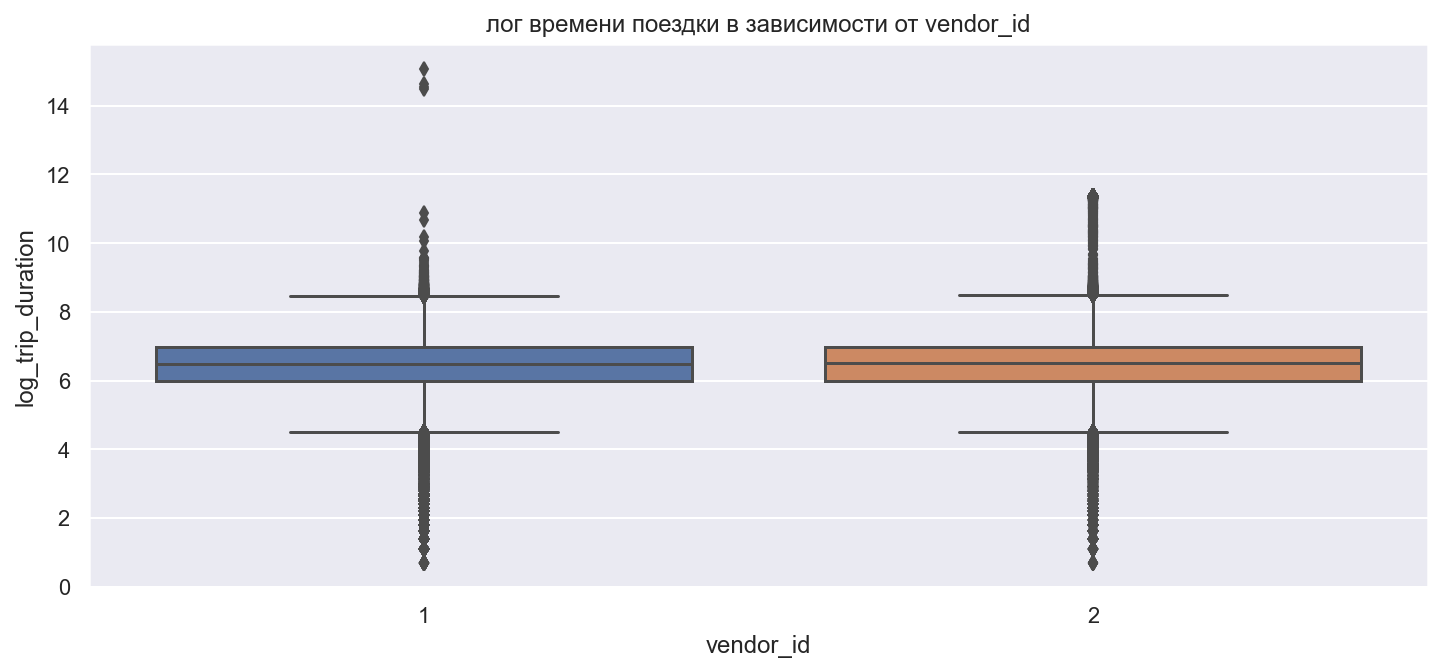

In [140]:
 sns.boxplot(data=data, x='vendor_id', y='log_trip_duration').set_title('лог времени поездки в зависимости от vendor_id')

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [141]:
data['vendor_id'].replace({1: 0, 2: 1}, inplace=True)
data['store_and_fwd_flag'].replace({'N': 0, 'Y': 1}, inplace=True)

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

думаю, что нет, они похоже распределены, оттого при домножении на одинаковый вес будут давать в рез одинаковое число))

мб passenger count может работать, но нам там не нужно столько вариаций - нам имхо 3 категории потребуются: 0, от 0 до 6 и больше 6

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [142]:
categorical_cols = ['weekday', 'month', 'hour', 'anomaly', 'heavy_traffic', 'light_traffic', 'newark_start', 'newark_finish', 'jfk_start', 'jfk_finish', 'laguardia_start', 'laguardia_finish', 'start_coords', 'finish_coords', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']
numerical_cols = ['yearday', 'loghaversine']
X = data[categorical_cols+numerical_cols]
y = data['log_trip_duration']
X['loghaversine'].replace({-np.inf: -1}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

C:\Users\Masha\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [143]:
len(categorical_cols)

17

In [144]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [145]:
((y_pred - y_test)**2).mean()**0.5

0.5337746547823516

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

да, если честно, не сильно помогло

In [146]:
data.drop(columns = ['vendor_id', 'store_and_fwd_flag', 'passenger_count'], inplace = True)

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

! trigger warning ! вся наша дата на самом деле обучающая выборка, поэтому я меняла всю

In [147]:
data.columns

Index(['id', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'log_trip_duration', 'weekday', 'month', 'hour', 'anomaly', 'yearday',
       'haversine', 'loghaversine', 'heavy_traffic', 'light_traffic',
       'newark_start', 'newark_finish', 'jfk_start', 'jfk_finish',
       'laguardia_start', 'laguardia_finish', 'start_coords', 'finish_coords'],
      dtype='object')

In [148]:
data.isna().sum().sum() # мало ли что

0

<AxesSubplot:>

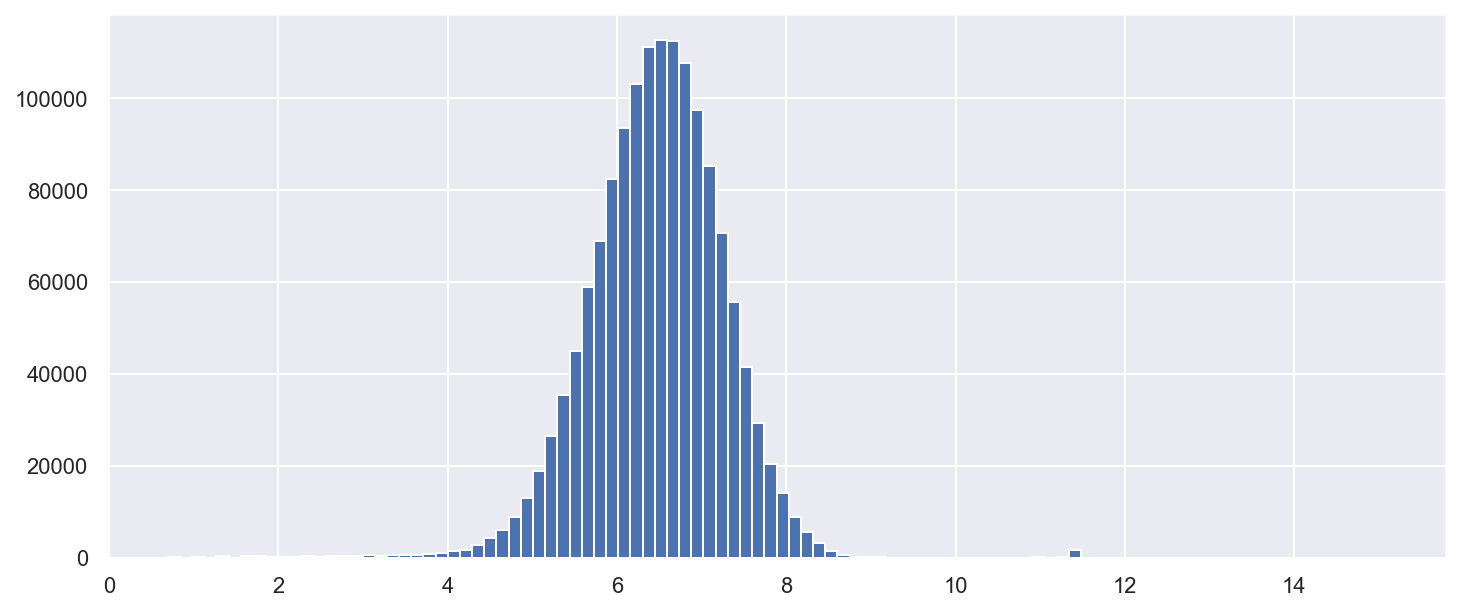

In [149]:
data['log_trip_duration'].hist(bins=100)

In [150]:
data = data[data['log_trip_duration']<11]

In [151]:
data = data[data['loghaversine'] != -np.inf]

<AxesSubplot:>

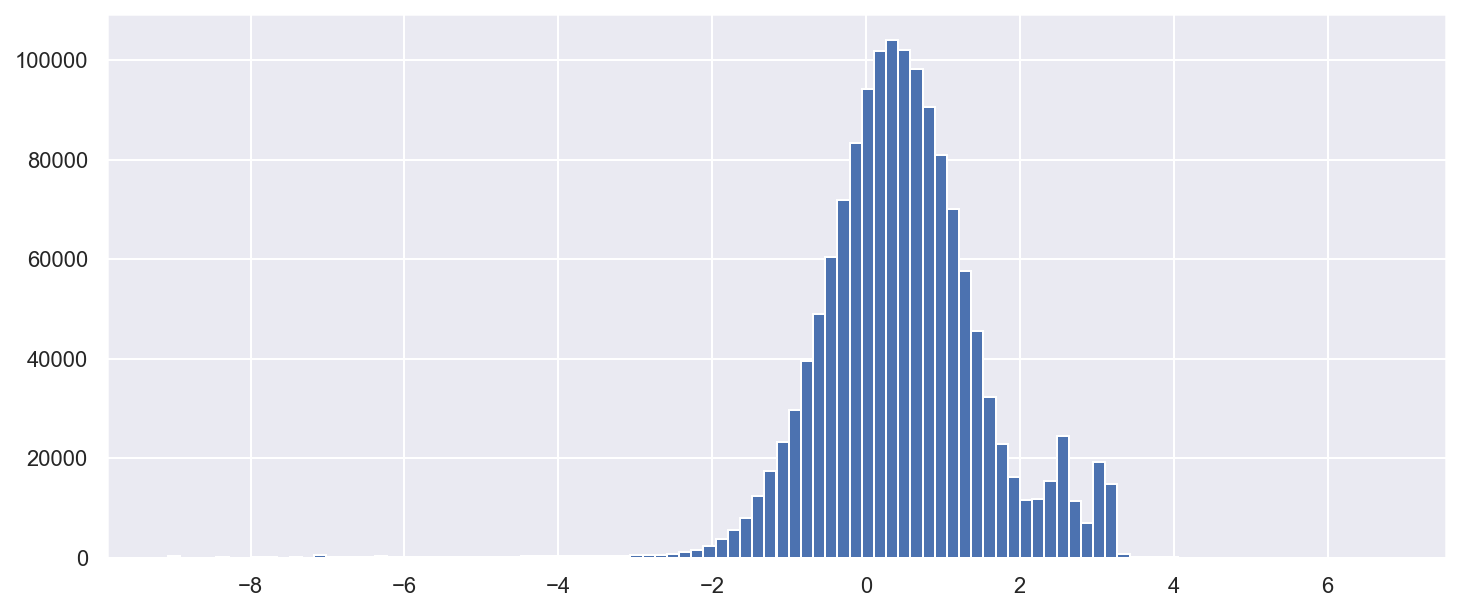

In [152]:
data['loghaversine'].hist(bins=100)

<AxesSubplot:>

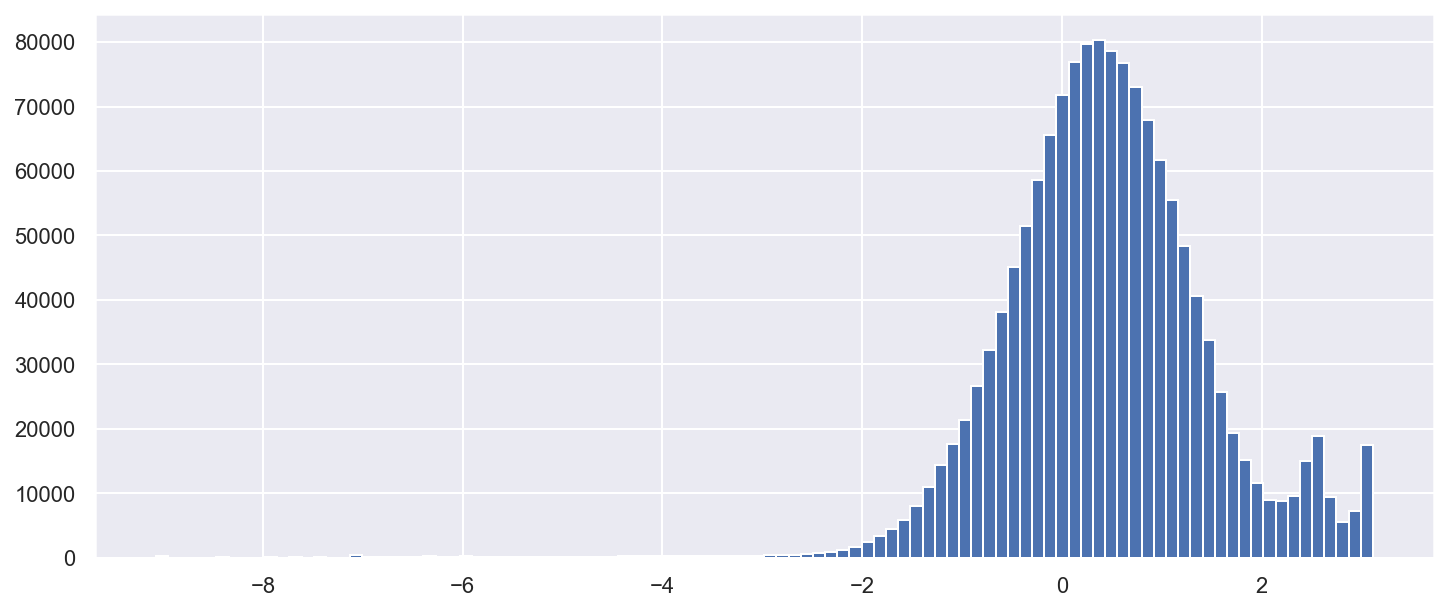

In [153]:
data[data['loghaversine'] < data['loghaversine'].quantile(0.99)]['loghaversine'].hist(bins=100)

In [154]:
data = data[data['loghaversine'] < data['loghaversine'].quantile(0.99)]

yearday не может быть выбросом, а аномальные дни мы до этого обработали. на графиках выше не было всяких странных дат до рождества христова, поэтому так и оставим

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [155]:
for i in ['store_and_fwd_flag', 'passenger_count', 'vendor_id']:
    categorical_cols.remove(i)

In [156]:
# не знаю как вам но для меня редкая - меньше 1% выборки
rare = len(data)/100

In [157]:
for i in categorical_cols:
    gb = data[categorical_cols+['id']].groupby(i).count()['id']
    print(gb[gb<rare])

Series([], Name: id, dtype: int64)
Series([], Name: id, dtype: int64)
Series([], Name: id, dtype: int64)
Series([], Name: id, dtype: int64)
Series([], Name: id, dtype: int64)
Series([], Name: id, dtype: int64)
newark_start
1    84
Name: id, dtype: int64
newark_finish
1    2009
Name: id, dtype: int64
Series([], Name: id, dtype: int64)
jfk_finish
1    9213
Name: id, dtype: int64
Series([], Name: id, dtype: int64)
Series([], Name: id, dtype: int64)
start_coords
4.0     3349
5.0     3142
6.0      737
11.0    1532
12.0    2477
13.0    4908
18.0    3878
Name: id, dtype: int64
finish_coords
4.0     6837
5.0     7827
6.0     2793
11.0    4117
12.0    3323
13.0    5874
18.0    5512
Name: id, dtype: int64


у нас данные по аэропортам иногда оказываются редкими - вот эти самые редкие объединим

In [158]:
data['random_airport_feature'] = data['jfk_finish']|data['newark_start']|data['newark_finish']

In [159]:
data.drop(columns = ['jfk_finish', 'newark_start', 'newark_finish'], inplace = True)

еще хотелось бы редкие начальные и конечные точки объединить - проблема что их потом, возможно, придется использовать в 15 задании. поэтому ЕЩЕ ОДНА КОПИЯ

In [161]:
data_for_later_usage = copy.deepcopy(data)
#data = copy.deepcopy(data_for_later_usage)

In [162]:
starts = data[['start_coords']+['id']].groupby('start_coords').count()['id']
start_ind = starts[starts<rare].index
d = {i:0 for i in start_ind}
data['start_coords'].replace(d, inplace = True)

In [163]:
finishes = data[['finish_coords']+['id']].groupby('finish_coords').count()['id']
finish_ind = finishes[finishes<rare].index
d = {i:0 for i in finish_ind}
data['finish_coords'].replace(d, inplace = True)

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке

In [164]:
categorical_cols = ['weekday', 'month', 'hour', 'anomaly', 'heavy_traffic', 'light_traffic', 'jfk_start', 'laguardia_start', 'laguardia_finish', 'start_coords', 'finish_coords', 'random_airport_feature']
numerical_cols = ['yearday', 'loghaversine']
X = data[categorical_cols+numerical_cols]
y = data['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [165]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [166]:
((y_pred - y_test)**2).mean()

0.24394473793445354

In [302]:
0.24394473793445354**0.5

0.4939076208507554

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [167]:
len(categorical_cols)

12

In [168]:
len(model['preprocessing'].transformers_[1][1].get_feature_names(categorical_cols))

77

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [169]:
from sklearn.linear_model import Lasso

In [170]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regression', Lasso())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [171]:
((y_pred - y_test)**2).mean()

0.5681545443698656

In [303]:
0.5681545443698656**0.5

0.7537602698271285

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [177]:
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=13)

In [231]:
alph = np.logspace(-5, 2, 7)
lasso_array = []
ridge_array = []
weights_l = []
weights_r = []

In [232]:
for alp in alph:
    for mod, arr in zip((Lasso(alpha = alp), Ridge(alpha = alp)), [[lasso_array, weights_l], [ridge_array, weights_r]]):
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numerical_transformer, numerical_cols),
                ('cat', categorical_transformer, categorical_cols)
            ])

        pipeline = Pipeline(steps=[
            ('preprocessing', preprocessor),
            ('regression', mod)
        ])
        
        model = pipeline.fit(X_t, y_t)
        y_pred = model.predict(X_val)
        arr[0].append(((y_pred - y_val)**2).mean())
        arr[1].append(sum(model['regression'].coef_ == 0))

In [233]:
print('best alpha for lasso ', alph[np.array(lasso_array).argmin()], ' gives mse = ', min(np.array(lasso_array)))

best alpha for lasso  1e-05  gives mse =  0.24467434734439464


In [234]:
print('best alpha for ridge ', alph[np.array(ridge_array).argmin()], ' gives mse = ', min(np.array(ridge_array)))

best alpha for ridge  0.0021544346900318843  gives mse =  0.24468190697124986


In [235]:
print('best classifier is ', *['ridge' if min(ridge_array)<min(lasso_array) else 'lasso'])

best classifier is  lasso


In [278]:
best_alpha = alph[np.array(lasso_array).argmin()]

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [236]:
weights_l

[6, 12, 47, 76, 78, 79, 79]

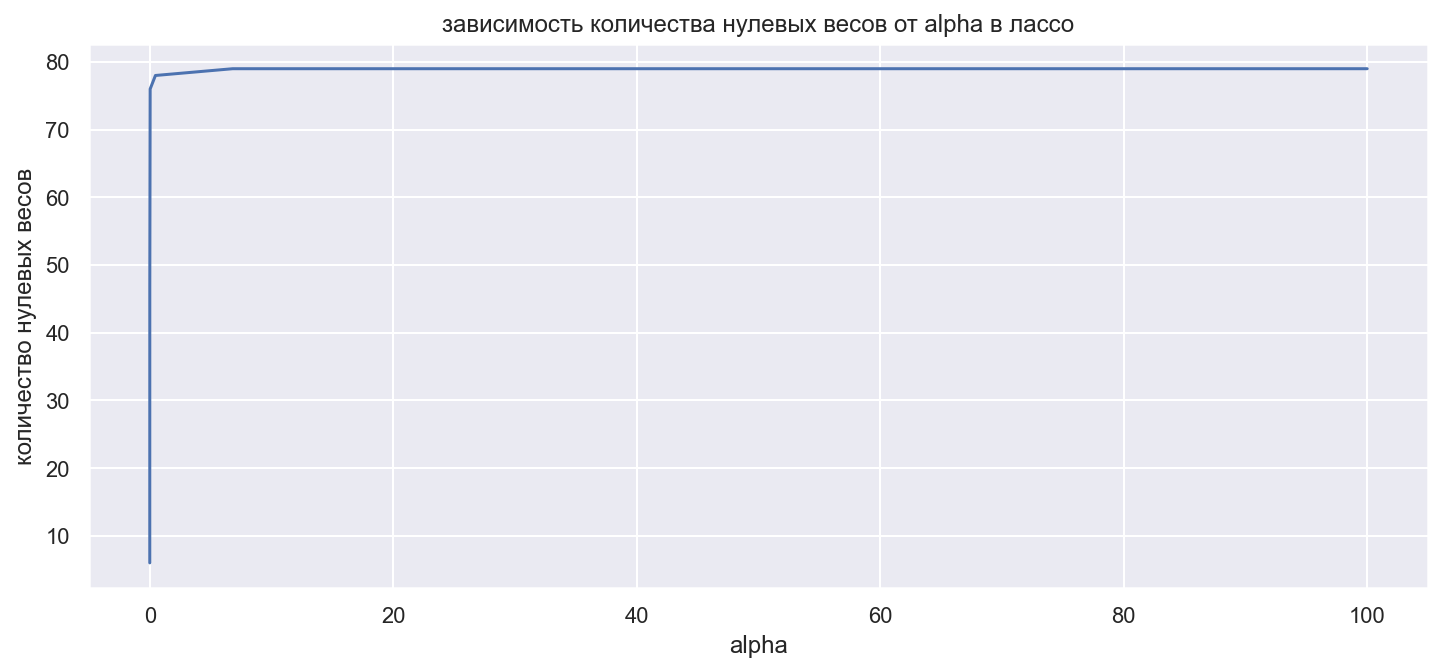

In [237]:
fig = sns.lineplot(x = alph, y = weights_l).set_title('зависимость количества нулевых весов от alpha в лассо')
plt.xlabel("alpha")
plt.ylabel("количество нулевых весов")

plt.show(fig)


будем считать что потеря половины признаков это наша третья альфа с 47 нулями (ооочень некорректное приближение)

In [244]:
lasso_array[2] - min(min(ridge_array), min(lasso_array))

0.005610593109303175

т.е. на самом деле относительно общей ошибки не самая страшная потеря

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

частые пары в нашем признаке будут закодированы под общим весом, а в изначальном датасете каждый признак имеет свой независимый (относительно) вес. соответственно, отправка и конец будут неравноценны

In [267]:
data_for_later_usage['pairs'] = data_for_later_usage.apply(lambda x: str(x['start_coords'])+'0'+str(x['finish_coords']), axis=1)

In [268]:
len(data_for_later_usage['pairs'].unique())

360

In [269]:
frequent_pairs = data_for_later_usage.groupby('pairs').count()['id'].nlargest(100).index

In [270]:
d = {frequent_pairs[i]:i for i in range(len(frequent_pairs))}

In [273]:
data['final_pairs'] = data_for_later_usage['pairs'].apply(lambda x: d.get(x, -1))

In [275]:
#data.drop(columns = 'pairs', inplace = True)

In [272]:
data['final_pairs']

0          86
1          66
2          -1
3           0
4          21
           ..
1458639     7
1458640    15
1458641    45
1458642     2
1458643    12
Name: final_pairs, Length: 1436281, dtype: int64

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [280]:
categorical_cols = ['weekday', 'month', 'hour', 'anomaly', 'heavy_traffic', 'light_traffic', 'jfk_start', 'laguardia_start', 'laguardia_finish', 'start_coords', 'finish_coords', 'random_airport_feature', 'final_pairs']
numerical_cols = ['yearday', 'loghaversine']
X = data[categorical_cols+numerical_cols]
y = data['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [281]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regression', Lasso(alpha = best_alpha))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\Masha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2135.603525885701, tolerance: 56.92808285174057
  model = cd_fast.sparse_enet_coordinate_descent(


In [283]:
((y_pred - y_test)**2).mean()

0.21912799509807576

In [304]:
0.21912799509807576**0.5

0.46811109268855805

качество лучше хотя и objective did not converge, я в меру довольна, очень устала и бесконечно хочу спать

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.